# Recipe Site Traffic Project

## Data Validation
This data set has 947 rows, 8 columns. I have validated all variables and I have  made some changes after validation. All the columns are just as described in the data dictionary:
- recipe: numeric values, same as the description. No cleaning is needed.
- calories: numeric values, It contained 52 missing values. Cleaning was made later on.
- carbohydrate: numeric values, It contained 52 missing values. Cleaning was made later on.
- sugar: numeric values, It contained 52 missing values. Cleaning was made later on.
- protein: numeric values, It contained 52 missing values. Cleaning was made later on.
**Note: We noticed that in these 52 missing values all the whole row containing fields calories, carbohydrates, sugar, and protein are missing so because they don't form a huge part of the data we decided to drop them**
- category: 11 categories without missing values, it contained one extra category called _'Chicken Breast'_ that we had to deal with and transform it into _'Chicken'_.
- servings: object that contained 2 extra fields _'6 as snack'_, and _'4 as snack'_ which where turned into their corresponding numbers (_6_ and _4_ respectively) and the whole column was transformed into numeric type.
- high_traffic: It contained one category _'High'_ and lots of missing value  which where assumed to be the low traffic and replaced with the wrod _'Low'_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder, PowerTransformer, RobustScaler, MinMaxScaler,QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('./recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
# Check for missing values
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [4]:
# Dealing with missing values
df['high_traffic']=df['high_traffic'].fillna(value="Low")
df = df.dropna()

In [5]:
# validate servings
df['servings'] = df['servings'].replace('4 as a snack','4')
df['servings'] = df['servings'].replace('6 as a snack','6')
df['servings'] = df['servings'].astype(int)

In [6]:
# validate 10 types of category
print(df['category'].unique())
df['category'] = df['category'].replace('Chicken Breast','Chicken')

['Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Pork' 'Chicken' 'Vegetable' 'Meat' 'Dessert']


In [7]:
#validate any negative values in numeric variables
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High


#### Relationship between calories, carbohydrate, sugar, protein and high_traffic
To spot the non-linear relationship, I decided to make boxplot to further investigate the relationship between calories, carbohydrate, sugar, protein and our target varible - high_traffic. From the boxplots below, there is a week relationship between these numeric variables and high_traffic and there are lots of outliers out there. I found out there is a definite number of servings and it is not a continuous variable, so i decided to further explore it with the categorical types.

[Text(0.5, 1.0, 'Servings vs High Traffic')]

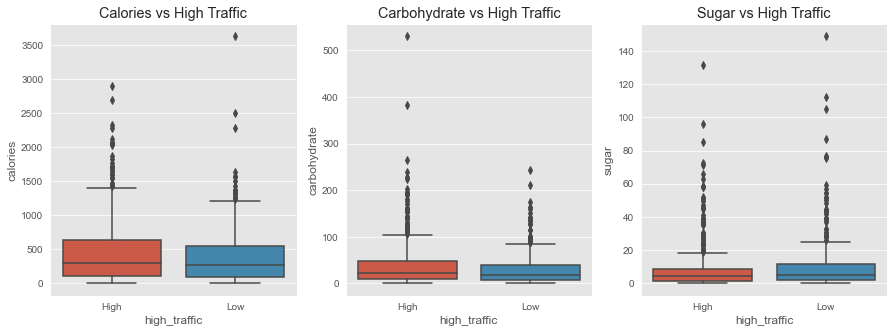

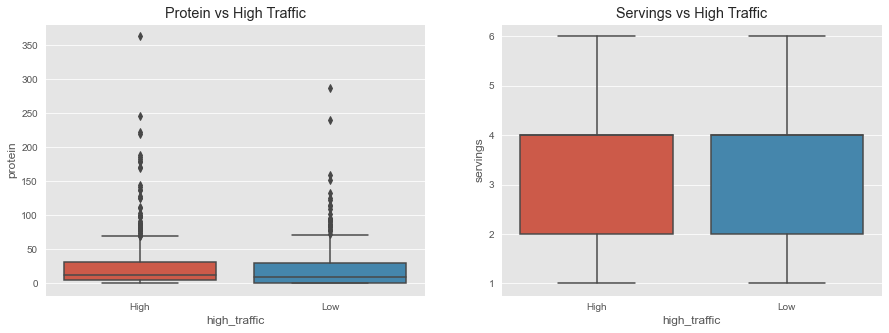

In [9]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(data=df,x='high_traffic',y='calories',ax=axes[0]).set(title='Calories vs High Traffic')
sns.boxplot(data=df,x='high_traffic',y='carbohydrate',ax=axes[1]).set(title='Carbohydrate vs High Traffic')
sns.boxplot(data=df,x='high_traffic',y='sugar',ax=axes[2]).set(title='Sugar vs High Traffic')

fig1,axes1 = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(data=df,x='high_traffic',y='protein',ax=axes1[0]).set(title='Protein vs High Traffic')
sns.boxplot(data=df,x='high_traffic',y='servings',ax=axes1[1]).set(title='Servings vs High Traffic')

### Categorical Variables category, servings and high_traffic
Since category and servings are most related to traffic, I checked their characteristics. From the bar chart below, the most common categories are Beverages and Chicken. Also, the most servings is 4.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Potato'),
  Text(1, 0, 'Breakfast'),
  Text(2, 0, 'Beverages'),
  Text(3, 0, 'One Dish Meal'),
  Text(4, 0, 'Chicken'),
  Text(5, 0, 'Lunch/Snacks'),
  Text(6, 0, 'Pork'),
  Text(7, 0, 'Vegetable'),
  Text(8, 0, 'Meat'),
  Text(9, 0, 'Dessert')])

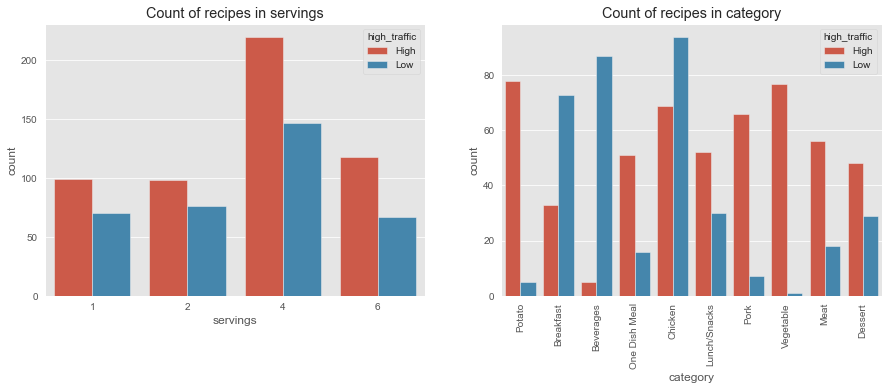

In [10]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df,x='servings',hue='high_traffic',ax=axes[0]).set(title = 'Count of recipes in servings')
sns.countplot(data=df,x='category',hue='high_traffic',ax=axes[1]).set(title = 'Count of recipes in category')
plt.xticks(rotation = 90)


#### Relationship between calories, carbohydrate, sugar, protein and high_traffic
To spot the non-linear relationship, I decided to make boxplot to further investigate the relationship between calories, carbohydrate, sugar, protein and our target varible - high_traffic. From the boxplots below, there is a week relationship between these numeric variables and high_traffic and there are lots of outliers out there. I found out there is a definite number of servings and it is not a continuous variable, so i decided to further explore it with the categorical types.

[Text(0.5, 1.0, 'Servings vs High Traffic')]

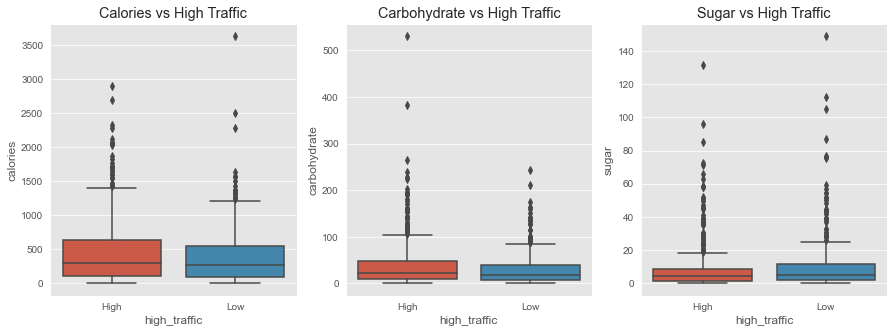

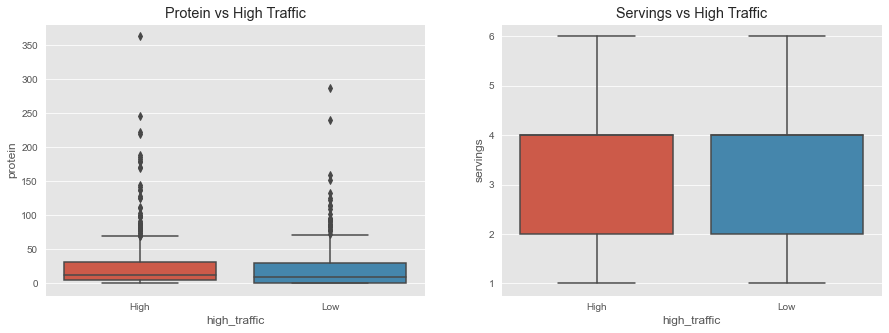

In [9]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(data=df,x='high_traffic',y='calories',ax=axes[0]).set(title='Calories vs High Traffic')
sns.boxplot(data=df,x='high_traffic',y='carbohydrate',ax=axes[1]).set(title='Carbohydrate vs High Traffic')
sns.boxplot(data=df,x='high_traffic',y='sugar',ax=axes[2]).set(title='Sugar vs High Traffic')

fig1,axes1 = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(data=df,x='high_traffic',y='protein',ax=axes1[0]).set(title='Protein vs High Traffic')
sns.boxplot(data=df,x='high_traffic',y='servings',ax=axes1[1]).set(title='Servings vs High Traffic')

### Categorical Variables category, servings and high_traffic
Since category and servings are most related to traffic, I checked their characteristics. From the bar chart below, the most common categories are Beverages and Chicken. Also, the most servings is 4.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Potato'),
  Text(1, 0, 'Breakfast'),
  Text(2, 0, 'Beverages'),
  Text(3, 0, 'One Dish Meal'),
  Text(4, 0, 'Chicken'),
  Text(5, 0, 'Lunch/Snacks'),
  Text(6, 0, 'Pork'),
  Text(7, 0, 'Vegetable'),
  Text(8, 0, 'Meat'),
  Text(9, 0, 'Dessert')])

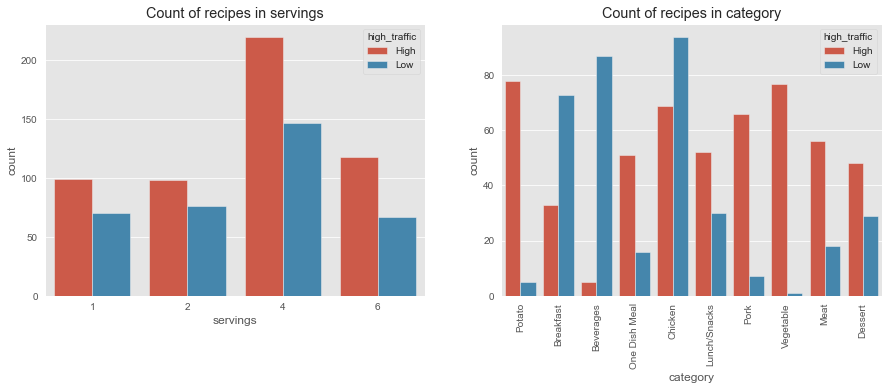

In [10]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df,x='servings',hue='high_traffic',ax=axes[0]).set(title = 'Count of recipes in servings')
sns.countplot(data=df,x='category',hue='high_traffic',ax=axes[1]).set(title = 'Count of recipes in category')
plt.xticks(rotation = 90)


## Model Fitting & Evaluation
Predicting the price is a classification problem in machine learning. I am choosing the Logestic  Regression model because we our target variable is a binary outcome. The comparison model I am choosing is the Random Forest Classifier model to provide robust and accurate predictions by combining the power of multiple decision trees, reducing overfitting and improving generalization.

For the evaluation, I am choosing **Accuracy Score** and **ROC_AUC_SCORE** to evaluate the model. Accuracy Score show the proportion of correctly predicted instances. ROC_AUC_SCORE measures how well a model can distinguish between two classes (e.g., positive and negative) by assessing the shape of the curve formed when plotting true positive rate against false positive rate.

### Prepare Data for Modelling
To enable modelling, we chose year,model,transmission,mileage,fuelType,tax,engineSize as features, price as target variables. I also have made the following changes:
- Scaled the numeric features
- Converted the categorical variables into dummy_variables.
- Splitted the data into a training set and a test set

In [11]:
feature_cols = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings']
X = df[feature_cols] # Features
y = df['high_traffic'] # Target Variable

In [12]:
# Define Scalars
rs = RobustScaler()
le = LabelEncoder()

X = pd.get_dummies(X,dtype=float)
y=le.fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42,stratify=y)

In [14]:
# I decided not to scale servings becuase it looks like categorical types and doesn't have continuous values
cols_to_scale = {'calories', 'carbohydrate', 'sugar', 'protein'}
for col in cols_to_scale:
        X_train[col] = rs.fit_transform(X_train[[col]])
        X_test[col] = rs.transform(X_test[[col]])

### Linear Regression Model

In [15]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [16]:
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:,1]

lr_accuracy_score = accuracy_score (y_test,y_pred)
print(f'Accuracy score = {lr_accuracy_score}')
print(f'ROC_AUC score = {roc_auc_score(y_test,y_pred_proba)}')

Accuracy score = 0.7821229050279329
ROC_AUC score = 0.8416407061266875


#### Finding the feature importance

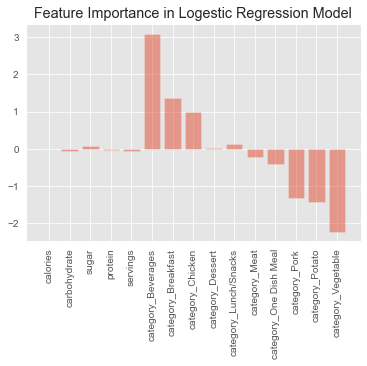

In [17]:
resultdict = {}
for i in range(len(X.columns)):
    resultdict[X.columns[i]] = lr.coef_[0,i]

plt.bar(resultdict.keys(),resultdict.values(), alpha=0.5)
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Logestic Regression Model');

### Random Forest Classification Model

In [18]:
tree = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 10, n_estimators = 200,random_state=42)

tree.fit(X_train,y_train)

C:\Users\rhaye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [19]:
y_pred = tree.predict(X_test)
y_pred_proba = tree.predict_proba(X_test)[:,1]

tree_accuracy_score = accuracy_score(y_test,y_pred)
print(f'Accuracy score {tree_accuracy_score}')
print(f'ROC_AUC score {roc_auc_score(y_test,y_pred_proba)}')

Accuracy score 0.7206703910614525
ROC_AUC score 0.8075025960539979


#### Finding the best parameter for Random Forest Classifier Model

In [20]:
classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,5,14,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(grid_search.best_score_))

best_classifier = grid_search.best_estimator_
test_accuracy = best_classifier.score(X_test, y_test)
print("Test Accuracy: {:.4f}".format(test_accuracy))

C:\Users\rhaye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\rhaye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\rhaye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

Best Parameters:  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.7500
Test Accuracy: 0.7207


C:\Users\rhaye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


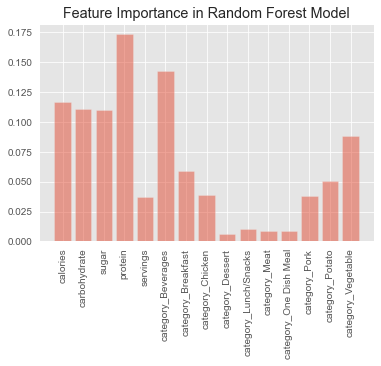

In [21]:
resultdict = {}
importance = tree.feature_importances_
for i in range(len(X.columns)):
    resultdict[X.columns[i]] = importance[i]

plt.bar(resultdict.keys(),resultdict.values(), alpha=0.5)
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Random Forest Model');

## Results
The ROC_AUC score of the Logistic Regression, and the Random Forest Classifier model is 0.84 and 0.80, meaning the **Logistic Regression fits the features better.** The Accuracy score of the Logistic Regression, and the Random Forest Classifier model is 0.78 and 0.72, meaning the **Logistic Regression model has less error in predicting values.**

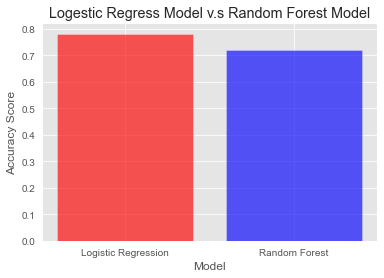

In [22]:
x_axis = ['Logistic Regression','Random Forest']
y_axis = [lr_accuracy_score,tree_accuracy_score]

plt.bar(x_axis,y_axis,color=['red','blue'],alpha = 0.65)
plt.title('Logestic Regress Model v.s Random Forest Model')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.show()

### Evaluate by Business Criteria
The project manager need to correctly predict whether recipes will have high traffic 80% of the times. That was very hard to achieve but we reached a very close accuracy of 78% using the **Logistic Regression model**.